In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import pipe_lines
from mlflow import catboost
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow

mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler




In [2]:
df = pd.read_csv('data/Student_Performance.csv')

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
df.isnull().sum()   

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df["Performance Index"].mean()

55.2248

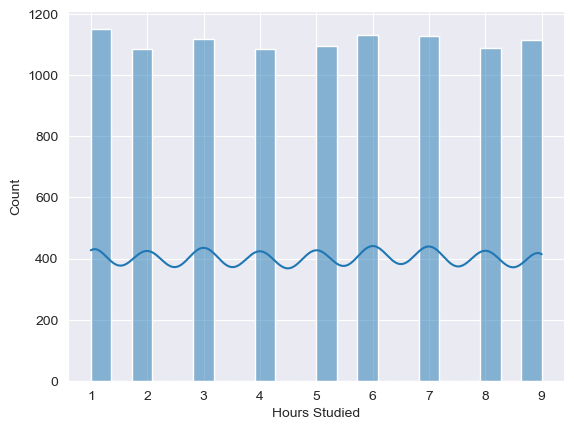

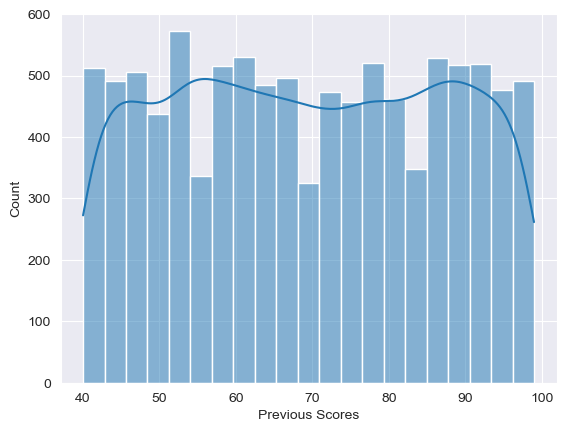

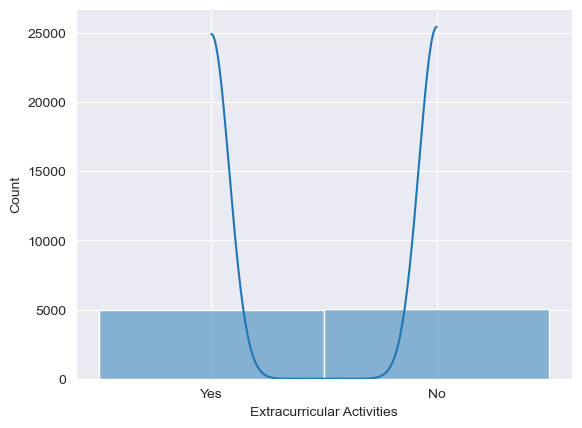

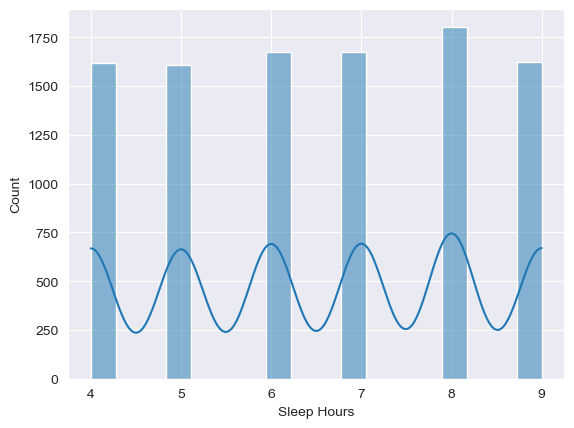

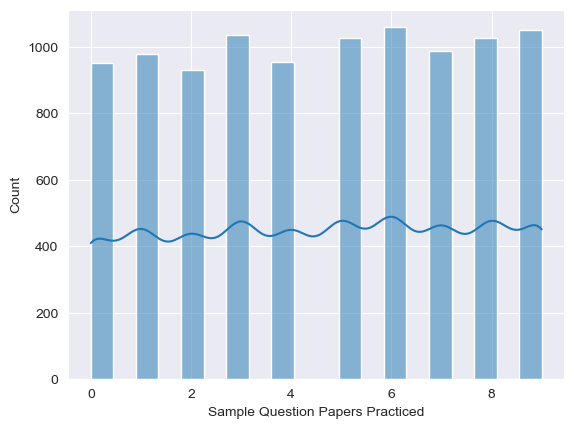

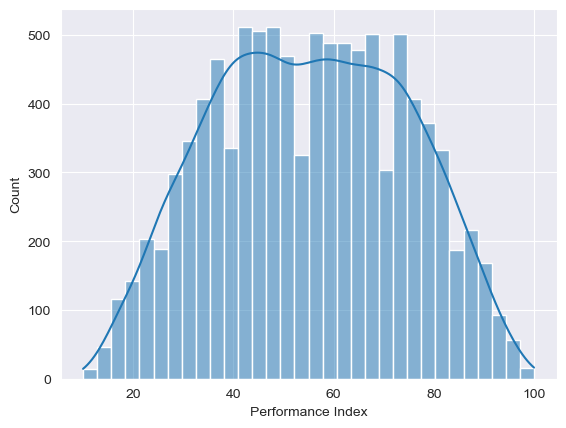

In [7]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=30)
    plt.show()

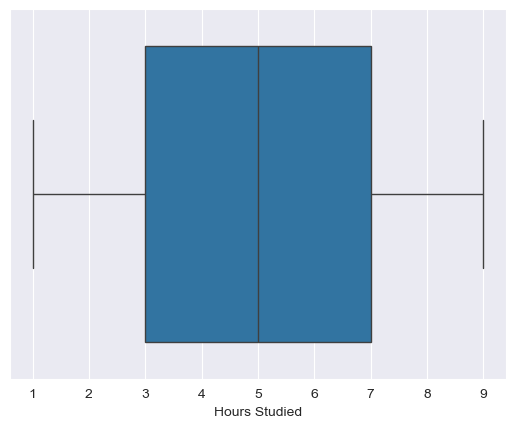

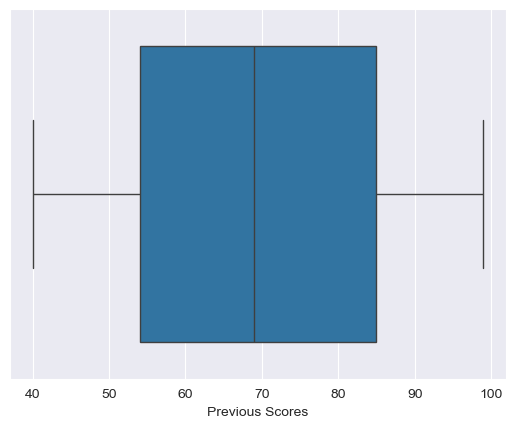

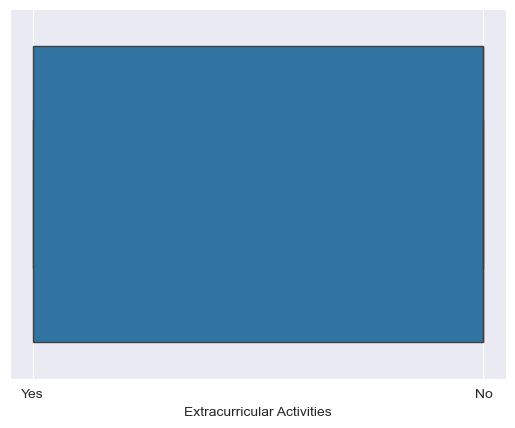

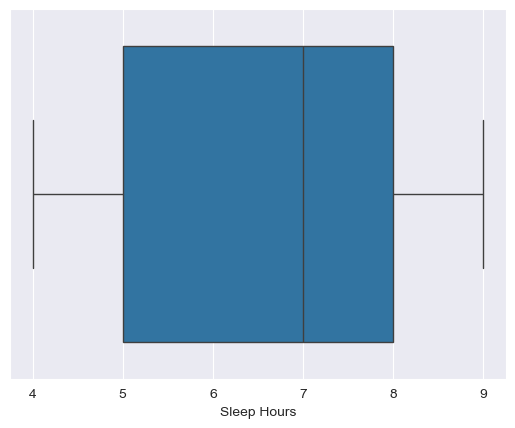

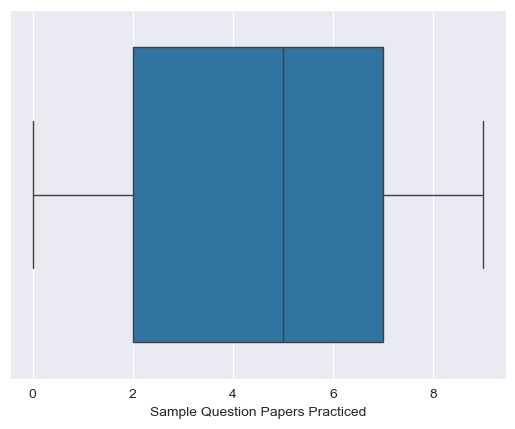

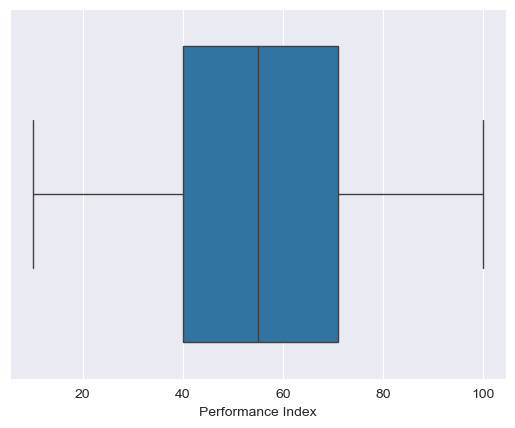

In [8]:
for col in df.columns:
    sns.boxplot(data = df, x=col)
    plt.show()

In [9]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [11]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")  # Ensure dense output
encoder.fit(df[['Extracurricular Activities']])
encoded_array = encoder.transform(df[['Extracurricular Activities']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Extracurricular Activities']))
df_final = pd.concat([df.drop(columns=['Extracurricular Activities']), encoded_df], axis=1)

print(df_final.head())

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities_Yes  
0                             1.0  
1                             0.0  
2                             1.0  
3                             1.0  
4                             0.0  


In [12]:
df_final.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800,0.494800
std,2.589309,17.343152,1.695863,2.867348,19.212558,0.499998
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000


In [13]:
X = df_final.drop(columns = ['Performance Index'])
y = df_final['Performance Index']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
9254,5,49,7,5,0.0
1561,2,48,7,6,1.0
1670,2,81,7,2,0.0
6087,2,46,6,1,0.0
6669,8,47,9,0,0.0
...,...,...,...,...,...
5734,8,50,6,6,1.0
5191,4,68,9,3,0.0
5390,9,48,7,6,0.0
860,1,47,9,0,0.0


In [16]:
X_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
6252,5,69,8,2,0.0
4684,2,46,4,8,1.0
1731,7,56,7,5,1.0
4742,6,42,8,5,1.0
4521,7,53,4,6,0.0
...,...,...,...,...,...
6412,2,70,7,3,0.0
8285,4,79,9,3,0.0
7853,2,40,7,2,1.0
1095,3,83,7,5,0.0


In [17]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [18]:
y_train

9254    36.0
1561    25.0
1670    59.0
6087    22.0
6669    40.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 8000, dtype: float64

In [19]:
X_train.select_dtypes(exclude='object')

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
9254,5,49,7,5,0.0
1561,2,48,7,6,1.0
1670,2,81,7,2,0.0
6087,2,46,6,1,0.0
6669,8,47,9,0,0.0
...,...,...,...,...,...
5734,8,50,6,6,1.0
5191,4,68,9,3,0.0
5390,9,48,7,6,0.0
860,1,47,9,0,0.0


In [20]:
num_cols = X_train.select_dtypes(exclude='object').columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

In [21]:
num_cols

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Extracurricular Activities_Yes']

In [22]:
cat_cols

[]

In [23]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('power_transformer', PowerTransformer())
])  
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
])
 # Preprocessor that applies transformations to numerical & categorical columns
 
 
main_pipe_ct = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),
     
    ("cat", CatBoostRegressor(iterations=500, verbose=100))
])
 
main_pipe_ct.fit(X_train, y_train)
y_pred = main_pipe_ct.predict(X_test)

main_pipe_dt = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("dt", DecisionTreeRegressor(max_depth=6, random_state=42))
])

main_pipe_dt.fit(X_train, y_train)
y_pred = main_pipe_dt.predict(X_test)


main_pipe_rf = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("rf", RandomForestRegressor(n_estimators=200, random_state=42))
])

main_pipe_rf.fit(X_train, y_train)
y_pred = main_pipe_rf.predict(X_test)


     

Learning rate set to 0.099909
0:	learn: 17.4907006	total: 105ms	remaining: 52.6s
100:	learn: 2.0275234	total: 499ms	remaining: 1.97s
200:	learn: 1.9643110	total: 716ms	remaining: 1.06s
300:	learn: 1.9164923	total: 928ms	remaining: 614ms
400:	learn: 1.8755687	total: 1.11s	remaining: 275ms
499:	learn: 1.8392282	total: 1.32s	remaining: 0us


In [61]:
scaler = StandardScaler()

In [62]:
def objective(trial):
    #criterion = trial.suggest_categorical("criterion", ["mse", "mae"])
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    #max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])
    ccp_alpha = trial.suggest_float("ccp_alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 10)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    main_pipe_dt = Pipeline([
        ("preprocessor", ColumnTransformer([
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ])),

        ("dt", DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, ccp_alpha=ccp_alpha, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, random_state=42))
    ])

    scores = cross_val_score(main_pipe_dt, X_train, y_train, cv=5, scoring="neg_mean_squared_error").mean()
    
    return -np.mean(scores)
    
    
    
    

In [63]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

[I 2025-03-13 20:39:53,928] A new study created in memory with name: no-name-73ee27f3-c200-43ff-b71a-fbea3f2a85e9
[I 2025-03-13 20:39:54,400] Trial 0 finished with value: 134.0684373483529 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.4464117103099179, 'ccp_alpha': 0.5908977327983027, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.7039835028111285}. Best is trial 0 with value: 134.0684373483529.
[I 2025-03-13 20:39:54,780] Trial 1 finished with value: 134.0684373483529 and parameters: {'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.45398501210574727, 'ccp_alpha': 0.10606277647229512, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.12184496308178772}. Best is trial 0 with value: 134.0684373483529.
[I 2025-03-13 20:39:55,154] Trial 2 finished with value: 134.0684373483529 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_weight_fraction_leaf'

In [64]:
study.best_params

{'max_depth': 8,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'min_weight_fraction_leaf': 0.021044316045128852,
 'ccp_alpha': 0.3725840751618763,
 'max_leaf_nodes': 7,
 'min_impurity_decrease': 0.01710982605921807}

In [65]:
main_pipe_dt = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("dt", DecisionTreeRegressor(**study.best_params, random_state=42))
])
main_pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced',
                                                   'Extracurricular '
                                                   'Activities_Yes']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [])])),
                ('dt',
                 DecisionTreeRegressor(ccp_alpha=0.3725840751618763,
                                       max_depth=8, max_leaf_nodes=7,
                                       min_impurity_decrease=0.01710982605921807,
                                       min_samples_leaf=8,
                                       min_weight_fraction_leaf=0.021044316045128852,
                                       random_state=42))])

In [28]:
mlflow.set_experiment("Decision Tree")


<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/regression_aufgabe/mlruns/774724030803643220', creation_time=1741634193589, experiment_id='774724030803643220', last_update_time=1741634193589, lifecycle_stage='active', name='Decision Tree', tags={}>

In [29]:
with mlflow.start_run(run_name=f"dt_experiment"):
    mlflow.log_params(study.best_params)
    mlflow.sklearn.log_model(main_pipe_dt, "model")
    dt_preds = main_pipe_dt.predict(X_test)
    dt_mse = mean_squared_error(y_test, dt_preds)
    dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
    dt_mae = mean_absolute_error(y_test, dt_preds)
    dt_r2 = r2_score(y_test, dt_preds)
    
   
    mlflow.log_metrics({"mse": dt_mse, "rmse": dt_rmse, "mae": dt_mae, "r2": dt_r2})
    
    residuals = y_test - dt_preds  # Errors

    plt.figure(figsize=(8,6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title("Residual Plot (Decision Tree)")
    plt.legend()
    mlflow.log_figure(plt.gcf(), "residual_plot.png")
    plt.close()


2025/03/13 19:37:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [30]:
mlflow.set_experiment("cat boost")

<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/regression_aufgabe/mlruns/500819534132583959', creation_time=1741718610719, experiment_id='500819534132583959', last_update_time=1741718610719, lifecycle_stage='active', name='cat boost', tags={}>

In [57]:
with mlflow.start_run(run_name=f"cat_experiment"):
   #mlflow.log_params(study.best_params)
    mlflow.sklearn.log_model(main_pipe_ct, "model")
    cat_preds = main_pipe_ct.predict(X_test)
    cat_mse = mean_squared_error(y_test, cat_preds)
    cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)
    cat_mae = mean_absolute_error(y_test, cat_preds)
    cat_r2 = r2_score(y_test, cat_preds)
    mlflow.log_metrics({"mse": cat_mse, "rmse": cat_rmse, "mae": cat_mae, "r2": cat_r2})

    residuals = y_test - cat_preds  # Errors

    plt.figure(figsize=(8,6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title("Residual Plot (CatBoost)")
    plt.legend()
    mlflow.log_figure(plt.gcf(), "residual_plot.png") #intead of plt.show() we use this to save the plot
    plt.close()
    

2025/03/13 19:55:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [32]:
def objective(trial):
    depth = trial.suggest_int("max_depth", 1, 10)
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    ccp_alpha = trial.suggest_float("ccp_alpha", 0, 1)
   
    max_samples = trial.suggest_float("max_samples", 0.1, 1)
    #max_features = trial.suggest_float("max_features", 0.1, 1)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    
    main_pipe_rf = Pipeline([
        ("preprocessor", ColumnTransformer([
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ])),

        ("rf", RandomForestRegressor(n_estimators=n_estimators, max_depth=depth, random_state=42, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_samples=max_samples, ccp_alpha=ccp_alpha))
    ])
    
    
    
    main_pipe_rf.fit(X_train, y_train)
    

    pred_rf = main_pipe_rf.predict(X_test)
    
    mse = mean_squared_error(y_test,  pred_rf)
    
    return mse

In [33]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

[I 2025-03-13 19:37:47,575] A new study created in memory with name: no-name-a104e535-0482-4b4d-a739-31e1eed7a3fd
[I 2025-03-13 19:37:48,421] Trial 0 finished with value: 26.861218466457437 and parameters: {'max_depth': 3, 'n_estimators': 196, 'ccp_alpha': 0.20814316909638275, 'max_samples': 0.3040192670000035, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 26.861218466457437.
[I 2025-03-13 19:37:50,446] Trial 1 finished with value: 7.899686512548432 and parameters: {'max_depth': 6, 'n_estimators': 360, 'ccp_alpha': 0.22565056128878003, 'max_samples': 0.5327455393103954, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 1 with value: 7.899686512548432.
[I 2025-03-13 19:37:51,422] Trial 2 finished with value: 25.97201971495934 and parameters: {'max_depth': 3, 'n_estimators': 301, 'ccp_alpha': 0.965535196081315, 'max_samples': 0.2302410660072583, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 1 with value: 7.899686512548432.
[I 20

In [34]:
study.best_params

{'max_depth': 6,
 'n_estimators': 413,
 'ccp_alpha': 0.19376319313984913,
 'max_samples': 0.22462871283586727,
 'min_samples_split': 3,
 'min_samples_leaf': 8}

In [35]:
main_pipe_rf = Pipeline([
    ("preprocessor", ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])),

    ("rf", RandomForestRegressor(**study.best_params, random_state=42))
])
main_pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced',
                                                   'Extracurricular '
                                                   'Activities_Yes']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [])])),
                ('rf',
                 RandomForestRegressor(ccp_alpha=0.19376319313984913,
                                       max_depth=6,
                                       max_samples=0.22462871283586727,
                                       min_samples_leaf=8, min_samples_split=3,
                                       n_estimators=413, random_state=42))])

In [36]:
mlflow.set_experiment("Random Forest")

<Experiment: artifact_location='file:///C:/Users/smalc/DataspellProjects/regression_aufgabe/mlruns/365270346314899967', creation_time=1741631070574, experiment_id='365270346314899967', last_update_time=1741631070574, lifecycle_stage='active', name='Random Forest', tags={}>

In [37]:
with mlflow.start_run(run_name=f"rf_experiment"):
    mlflow.log_params(study.best_params)
    mlflow.sklearn.log_model(main_pipe_rf, "model")
    rf_preds = main_pipe_rf.predict(X_test)
    rf_mse = mean_squared_error(y_test, rf_preds)
    rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
    rf_mae = mean_absolute_error(y_test, rf_preds)
    rf_r2 = r2_score(y_test, rf_preds)
    mlflow.log_metrics({"mse": rf_mse, "rmse": rf_rmse, "mae": rf_mae, "r2": rf_r2})

    residuals = y_test - rf_preds  # Errors

    plt.figure(figsize=(8,6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
    plt.xlabel("Residual (Error)")
    plt.ylabel("Frequency")
    plt.title("Residual Plot (Random Forest)")
    plt.legend()
    mlflow.log_figure(plt.gcf(), "residual_plot.png")
    plt.close()
        
    

2025/03/13 19:38:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [38]:
import mlflow
logged_model = 'runs:/107a7d3b26e54bb19dfe540369a389ef/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(X_test)

array([55.33159258, 21.88477427, 48.09378239, ..., 16.32427012,
       63.0810963 , 45.44979143])

In [39]:
rf_preds

array([54.93591014, 20.87863745, 48.71785748, ..., 18.51003955,
       63.02445188, 44.82651038])

In [40]:
y_pred

array([56.19      , 22.17666667, 46.325     , ..., 15.8975    ,
       62.85675   , 45.35666667])

In [41]:
dt_preds = main_pipe_dt.predict(X_test)
rf_preds = main_pipe_rf.predict(X_test)
cat_preds = main_pipe_ct.predict(X_test)


In [42]:
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = mean_squared_error(y_test, dt_preds, squared=False)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

print(f"Decision Tree MSE: {dt_mse:.4f}")
print(f"Decision Tree RMSE: {dt_rmse:.4f}")
print(f"Decision Tree MAE: {dt_mae:.4f}")
print(f"Decision Tree R² Score: {dt_r2:.4f}")

Decision Tree MSE: 39.5438
Decision Tree RMSE: 6.2884
Decision Tree MAE: 5.1295
Decision Tree R² Score: 0.8933


In [43]:
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest MSE: {rf_mse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest R² Score: {rf_r2:.4f}")

Random Forest MSE: 7.0556
Random Forest RMSE: 2.6562
Random Forest MAE: 2.1125
Random Forest R² Score: 0.9810


In [44]:
cat_mse = mean_squared_error(y_test, cat_preds)
cat_rmse = mean_squared_error(y_test, cat_preds, squared=False)
cat_mae = mean_absolute_error(y_test, cat_preds)
rf_r2 = r2_score(y_test, cat_preds)

print(f"CatBoost MSE: {cat_mse:.4f}")
print(f"CatBoost RMSE: {cat_rmse:.4f}")
print(f"CatBoost MAE: {cat_mae:.4f}")
print(f"CatBoost R² Score: {rf_r2:.4f}")

CatBoost MSE: 4.3082
CatBoost RMSE: 2.0756
CatBoost MAE: 1.6588
CatBoost R² Score: 0.9884


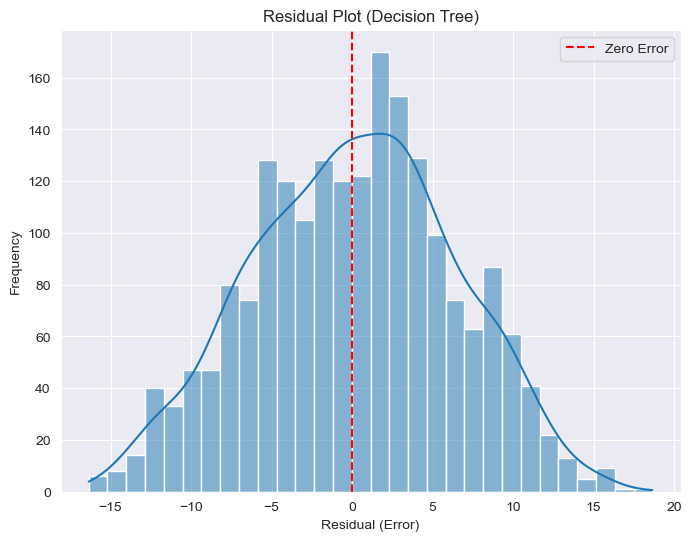

In [45]:
residuals = y_test - dt_preds  # Errors

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()


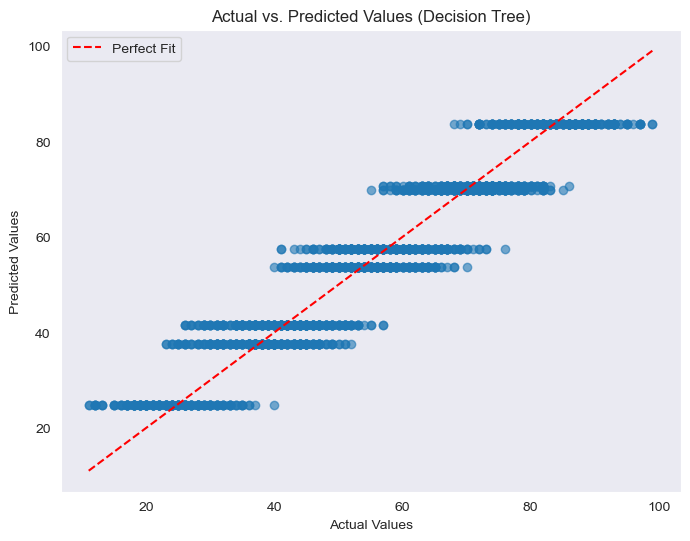

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, dt_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.legend()
plt.grid()
plt.show()


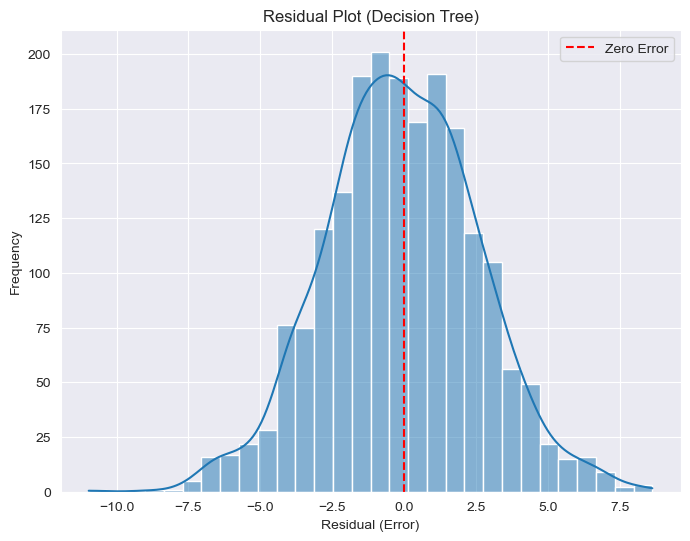

In [47]:

residuals = y_test - rf_preds  # Errors

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()


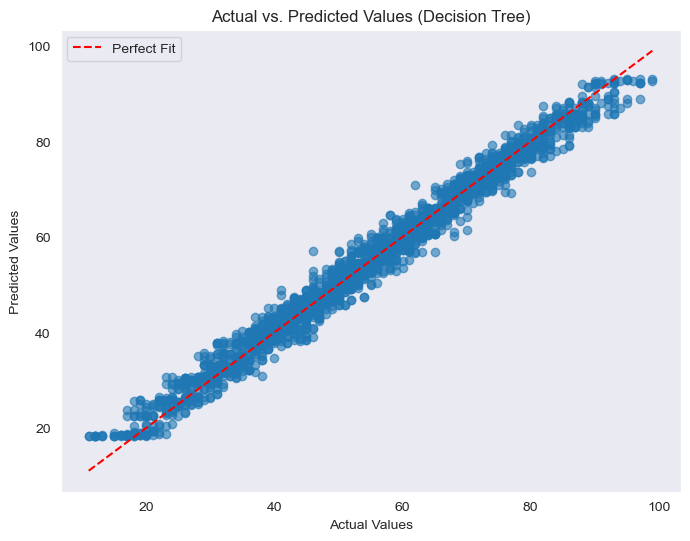

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.legend()
plt.grid()
plt.show()

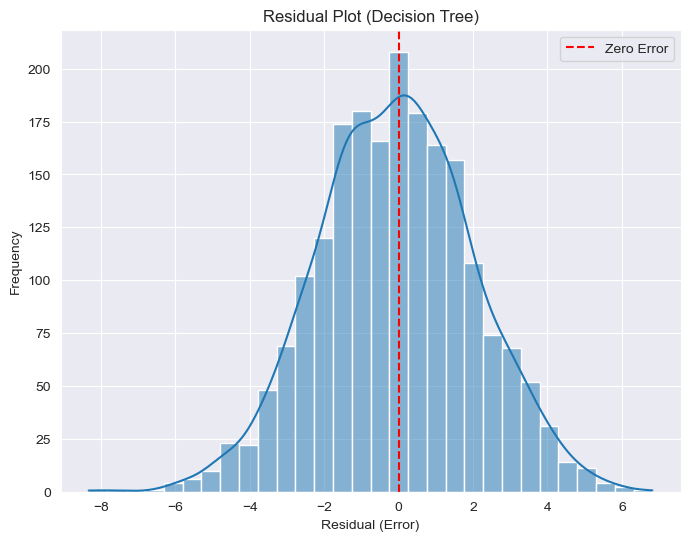

In [49]:
residuals = y_test - cat_preds  # Errors

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Decision Tree)")
plt.legend()
plt.show()

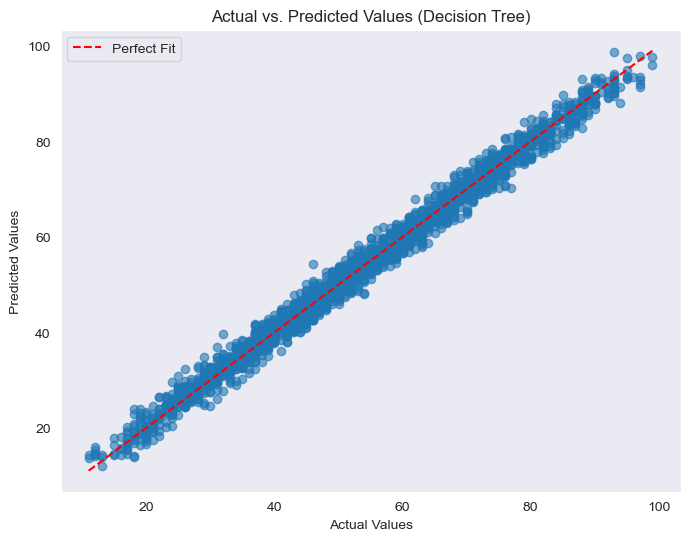

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, cat_preds, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.legend()
plt.grid()
plt.show()

In [51]:
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    importance_df = pd.DataFrame(importance, index=feature_names, columns=["Importance"])
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=importance_df["Importance"], y=importance_df.index)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance")
    plt.show()

Mean Squared Error (MSE): 5.1602
Root Mean Squared Error (RMSE): 2.2716
Mean Absolute Error (MAE): 1.8125
R² Score: 0.9861
Mean Absolute Percentage Error (MAPE): 3.96%
Median Absolute Error: 1.5493
Mean Absolute Error: 1.8125


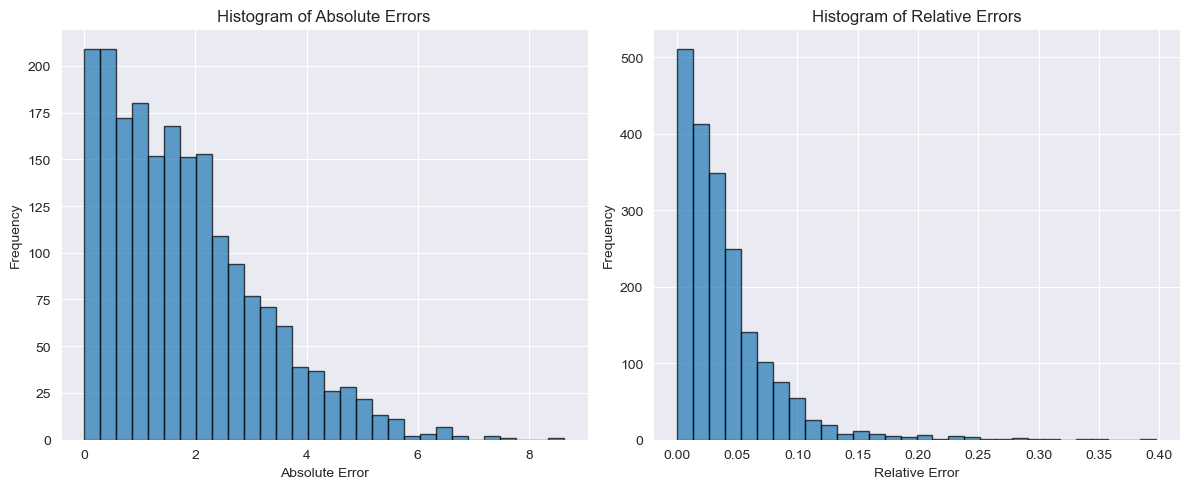

In [52]:
mse = mean_squared_error(y_test, y_pred) # Calculate Evaluation Metrics
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Errors
absolute_errors = np.abs(y_test - y_pred)
relative_errors = absolute_errors / np.abs(y_test)  # Relative error (percentage form)
differences = y_test - y_pred  # Differences between true and predicted

# Median and Mean of Errors
median_abs_error = np.median(absolute_errors)
mean_abs_error = np.mean(absolute_errors)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Median Absolute Error: {median_abs_error:.4f}")
print(f"Mean Absolute Error: {mean_abs_error:.4f}")

# Plot Histogram of Absolute Errors
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")

# Plot Histogram of Relative Errors
plt.subplot(1, 2, 2)
plt.hist(relative_errors, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Relative Error")
plt.ylabel("Frequency")
plt.title("Histogram of Relative Errors")

plt.tight_layout()
plt.show()


In [53]:
mape

3.9606945947369057

In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.142

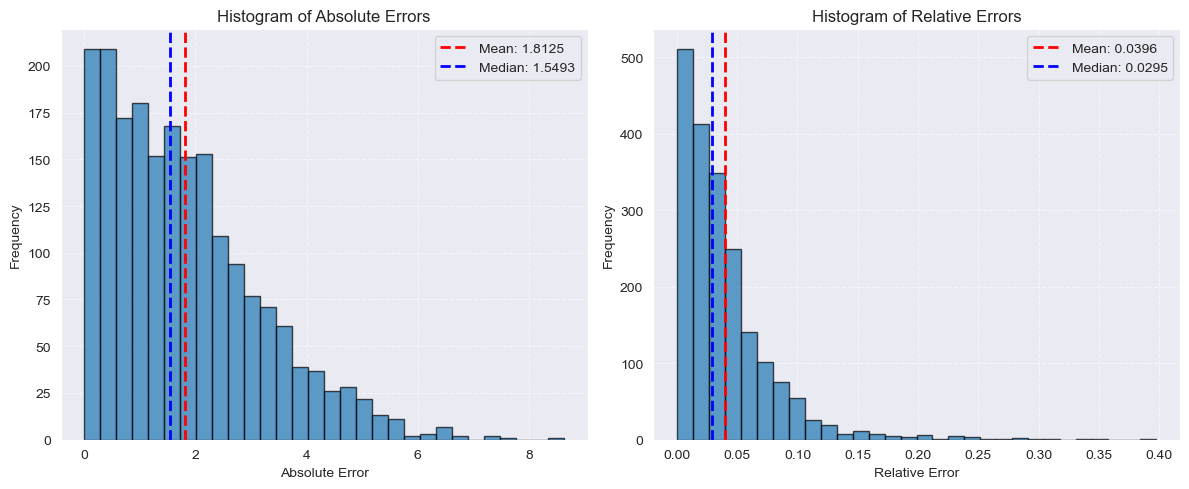

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate statistics
mean_abs_error = np.mean(absolute_errors)
median_abs_error = np.median(absolute_errors)

mean_rel_error = np.mean(relative_errors)
median_rel_error = np.median(relative_errors)

plt.figure(figsize=(12, 5))

# Histogram of Absolute Errors
plt.subplot(1, 2, 1)
plt.hist(absolute_errors, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_abs_error, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_abs_error:.4f}")
plt.axvline(median_abs_error, color='blue', linestyle='dashed', linewidth=2, label=f"Median: {median_abs_error:.4f}")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Histogram of Relative Errors
plt.subplot(1, 2, 2)
plt.hist(relative_errors, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_rel_error, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_rel_error:.4f}")
plt.axvline(median_rel_error, color='blue', linestyle='dashed', linewidth=2, label=f"Median: {median_rel_error:.4f}")
plt.xlabel("Relative Error")
plt.ylabel("Frequency")
plt.title("Histogram of Relative Errors")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


<Axes: ylabel='Count'>

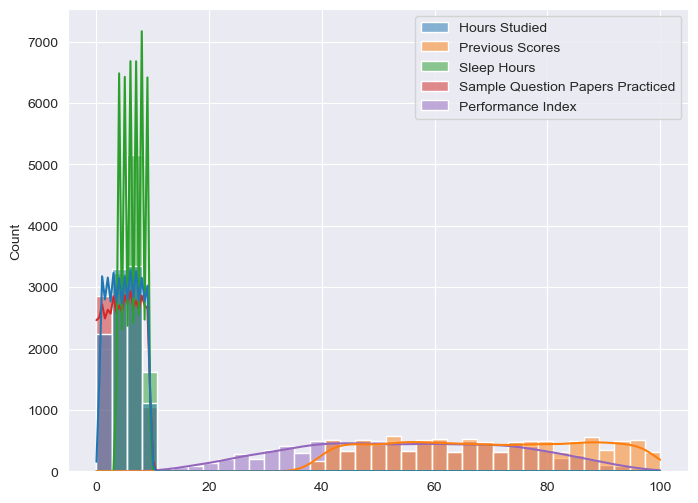

In [56]:
plt.figure(figsize=(8,6))
sns.histplot(df, kde=True)